<a href="https://colab.research.google.com/github/sonika-07/Play_Store_App_Review_Analysis/blob/main/Playstore_App_Review_Analysis_Capston_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.


# **STEP 1 : Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **STEP 2 : Loading the Playstore dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Capston Project/EDA/Play Store Review Analysis /Play Store Data.csv')

## **STEP 3 : Having overview and understanding the dataset**

1. Basic Data information

In [5]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
df.shape

(10841, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Check if there are some null values

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Five coulmns are having null values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


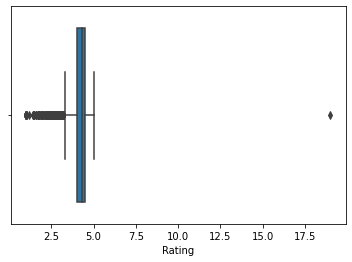

In [10]:
sns.boxplot(df['Rating'])

In the above graph, we can see that there is presence od outliers. 

### STEP 3: CLEANING DATA

1. Duplicate Values

In [11]:
df['App'].duplicated().any()

True

In [12]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [13]:
df[df['App']=='ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [14]:
df.drop_duplicates(subset='App',keep='first',inplace=True) 

In [15]:
df.App.value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [16]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           5331
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             119
Last Updated      1378
Current Ver       2818
Android Ver         33
dtype: int64

In [17]:
df.shape

(9660, 13)

2. Category

In [18]:
pd.DataFrame(df.Category.unique(),columns=['category'])

,category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [19]:
df.loc[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can clearly see that in Row number 10472, Rating is 19.0(which may be an outlier), Installs is Free(we want some number not 'FREE'),Price is 'Everyone'(Again not useful). Hence it's better to drop the row.

In [20]:
df=df.drop(10472)

In [21]:
df.shape

(9659, 13)

3. Price

In [22]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We have to remove the characters '$' , ',' , '+' and then convert the datatype to float.

In [23]:
char_to_remove=[',','$']
for char in char_to_remove:
  df['Price']=df['Price'].apply(lambda x:x.replace(char,""))

In [24]:
df['Price']=df['Price'].astype(float)

4. Installs

In [25]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

We have to remove the characters  ',' , '+' and then convert the datatype to integer type

In [26]:
char_to_remove=['+',',']
for char in char_to_remove:
  df['Installs']=df['Installs'].apply(lambda x:x.replace(char,""))

In [27]:
df['Installs']=df['Installs'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


5. Type

In [29]:
pd.DataFrame(df.Type.unique())

,0
0,Free
1,Paid
2,NaN


In [30]:
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since the Price of Row number 9148 is 0.0 ,hence we can fill the type with 'Free'.

In [31]:
df['Type']=df['Type'].fillna('Free')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


6. Rating

We can see that there are some null values in Rating column, we can fill these null values with zero (Since there are no ratings given to app, we can assume that Customer is not interested in that particular app)

In [33]:
df['Rating']=df['Rating'].fillna(0)

7. Reviews

In [34]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [35]:
df['Reviews']=df['Reviews'].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


8. Size

In [37]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Since the size are in kb, mb and 'varies with device'.
first we will remove '+' sign or ',' (if any) and then convert 'k' to '' and 'M' to '000' and finally 'varies with device' to NaN values. 
After we convert it to numeric values.

In [38]:
df['Size']=df.Size.apply(lambda x:x.strip('+'))
df['Size']=df['Size'].apply(lambda x:x.replace(',','')) 
df['Size']=df.Size.apply(lambda x: x.replace('k','')) 
df['Size']=df['Size'].apply(lambda x:x.replace('M','000')) 
df['Size']=df.Size.replace('Varies with device',np.NaN) 


In [39]:
df['Size'].fillna(str(df['Size'].mode()[0]),inplace=True)
df['Size']=df['Size'].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [41]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [42]:
#df.groupby('Category')['Size'].fillna(value=mean_size,inplace=True)
df['Size'].isna().any()

False

9. Number of apps with fake reviews

In [43]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,0.0,4.0,64000.0,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,11000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,0.0,2.0,238.0,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,0.0,11.0,2.0,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4.2,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,0.0,14.0,47000.0,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [44]:
df[df.Reviews>df.Installs].shape

(11, 13)

There are 11 apps with fake reviews. We can replace these Reviews with Number of Installs so that number of reviews is not greater than number of installs. 

In [45]:
df.loc[df['Reviews']>df['Installs'],'Reviews']=df['Installs']

In [46]:
df[df.Reviews>df.Installs].shape

(0, 13)

In [47]:
df[df['App']=='KBA-EZ Health Guide']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,1.0,25000.0,1,Free,0.0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up


9. Current Version 

In [48]:
df['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
2.27.1                   1
1.6.11                   1
20180517                 1
3.1.00                   1
2.0.148.0                1
Name: Current Ver, Length: 2817, dtype: int64

There are 1055 values which varies with device whch mans that their values are not present. We can replace these values with the mode of the data.

In [49]:
df.loc[df['Current Ver']=='Varies with device','Current Ver']=np.nan

In [50]:
df['Current Ver'].fillna(str(df['Current Ver'].mode()[0]),inplace=True)

10. Android Version

In [51]:
df['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [52]:
df.loc[df['Android Ver']=='Varies with device','Android Ver']=np.nan

In [53]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.3+ MB


Now we are done with the data Processing and Cleaning.


we can see that originally there were 10841 Rows and 13 Columns and in our cleaned Data we have 9659 Rows and 13 Columns (all are non-null)

**USER REVIEW DATASET**

In [55]:
df2=pd.read_csv('/content/drive/MyDrive/Capston Project/EDA/Play Store Review Analysis /User Reviews.csv')

In [56]:
df2.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [57]:
df2.shape

(64295, 5)

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [59]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [103]:
df2.dropna (subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],inplace=True)

In [104]:
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [60]:
corr=df.corr()

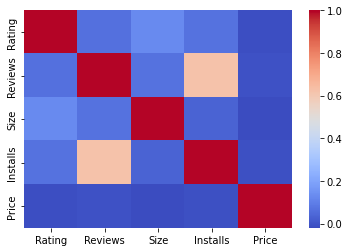

In [61]:
sns.heatmap(corr,cmap ='coolwarm')

Which app has highest number of installs?

In [62]:
app_install=pd.DataFrame(df[['App','Installs']].sort_values(by=['Installs'],ascending=False))
app_install

,App,Installs
336,WhatsApp Messenger,1000000000
152,Google Play Books,1000000000
1654,Subway Surfers,1000000000
3117,Maps - Navigate & Explore,1000000000
340,Gmail,1000000000
...,...,...
9917,Eu Sou Rico,0
6692,cronometra-br,0
5486,AP Series Solution Pro,0
9719,EP Cook Book,0


In [63]:
app_install[app_install['Installs']==1000000000].count()

App         20
Installs    20
dtype: int64

In [64]:
app_install_review=df[['App','Reviews']][df['Installs']==1000000000].reset_index(drop=True)

In [65]:
app_install_review

,App,Reviews
0,Google Play Books,1433233.0
1,Messenger – Text and Video Chat for Free,56642847.0
2,WhatsApp Messenger,69119316.0
3,Google Chrome: Fast & Secure,9642995.0
4,Gmail,4604324.0
5,Hangouts,3419249.0
6,Skype - free IM & video calls,10484169.0
7,Google Play Games,7165362.0
8,Subway Surfers,27722264.0
9,Facebook,78158306.0


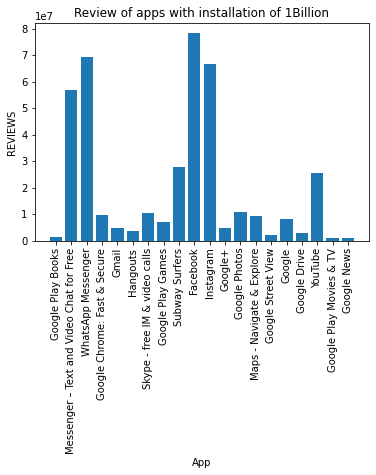

In [66]:
plt.bar(app_install_review['App'],app_install_review['Reviews'])
plt.xlabel('App')
plt.xticks(rotation=90)
plt.ylabel('REVIEWS')
plt.title('Review of apps with installation of 1Billion')
plt.show()

Here facebook has the highest number of reviews followed y whatsapp and instagram

In [67]:
df.info()
min(df['Size'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.3+ MB


1.0

Which category has the highest number of installs

In [68]:
category_install=pd.DataFrame(df.groupby(by='Category',as_index=False)['Installs'].sum())
category_install

,Category,Installs
0,ART_AND_DESIGN,114338100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140926107
8,EDUCATION,352952000
9,ENTERTAINMENT,2113660000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


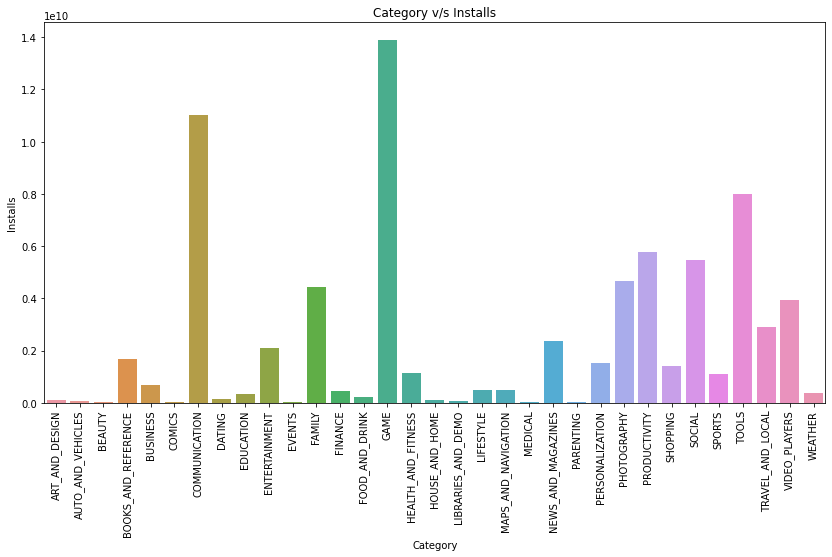

In [69]:
plt.figure(figsize=(14,7))
plt.xlabel('Categories')
plt.ylabel('Number of Installs')
plt.title('Category v/s Installs')
plt.xticks(rotation=90)
sns.barplot(category_install.Category,category_install.Installs)
plt.show()

Which are the apps with highest number of reviews?


In [70]:
app_reviews=df[['App','Reviews']].sort_values('Reviews',ascending=False).reset_index(drop=True).head(20)
app_reviews

,App,Reviews
0,Facebook,78158306.0
1,WhatsApp Messenger,69119316.0
2,Instagram,66577313.0
3,Messenger – Text and Video Chat for Free,56642847.0
4,Clash of Clans,44891723.0
5,Clean Master- Space Cleaner & Antivirus,42916526.0
6,Subway Surfers,27722264.0
7,YouTube,25655305.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
9,Clash Royale,23133508.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


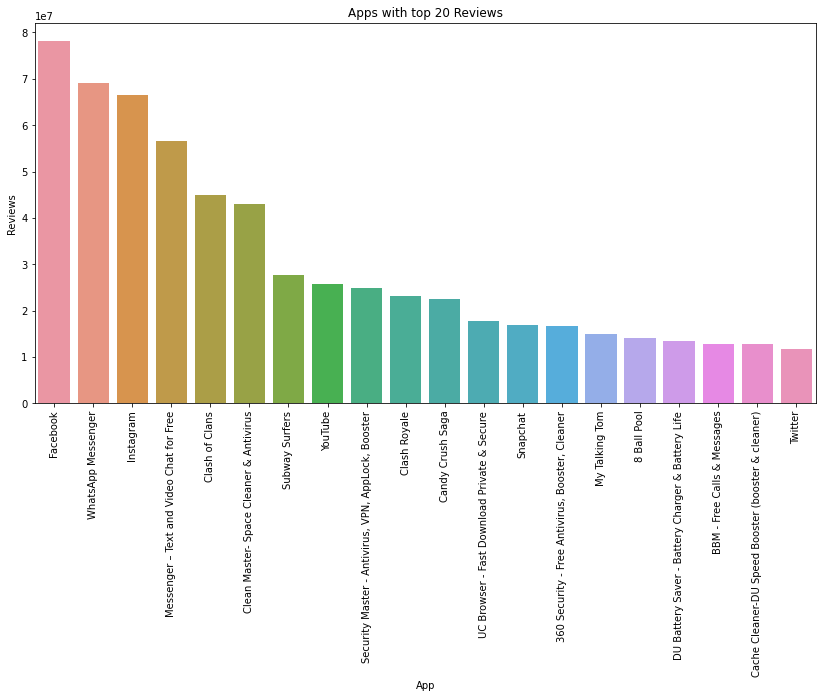

In [71]:
plt.figure(figsize=(14,7))
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.title('Apps with top 20 Reviews')
plt.xticks(rotation=90)
sns.barplot(app_reviews.App,app_reviews.Reviews)
plt.show()

Identifying number of apps based on different Content Rating. 

In [72]:
content_rating=pd.DataFrame(df['Content Rating'].value_counts())
content_rating=content_rating.reset_index()
content_rating.columns=['Content Rating','No of Apps']
content_rating

,Content Rating,No of Apps
0,Everyone,7903
1,Teen,1036
2,Mature 17+,393
3,Everyone 10+,322
4,Adults only 18+,3
5,Unrated,2


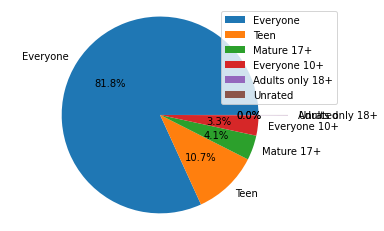

In [73]:
labels=content_rating['Content Rating']
sizes=content_rating['No of Apps']
myexplode = [0, 0, 0, 0, 0.3, 0.3]
plt.pie(sizes,labels=labels,explode=myexplode,autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show()

Find top 5 Revenue of paid apps

In [74]:
def revenue(a,b):
  return a*b

In [75]:
revenue_df=pd.DataFrame(df[['App']])
revenue_df['Revenue']=df.apply(lambda x:revenue(x['Installs'],x['Price']),axis=1)

In [76]:
revenue_df.sort_values(by=['Revenue'],ascending=False,inplace=True)
revenue_df_top5=revenue_df.head()
revenue_df_top5.style.set_properties(**{'background-color': 'black',
                           'color': 'green'})

,App,Revenue
2241,Minecraft,69900000.000000
5351,I am rich,39999000.000000
5356,I Am Rich Premium,19999500.000000
4034,Hitman Sniper,9900000.000000
7417,Grand Theft Auto: San Andreas,6990000.000000


Count the number of apps in each category

In [77]:
category_apps=pd.DataFrame(df.groupby(by='Category',as_index=False)['App'].count())
category_apps

,Category,App
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,420
5,COMICS,56
6,COMMUNICATION,315
7,DATING,171
8,EDUCATION,119
9,ENTERTAINMENT,102


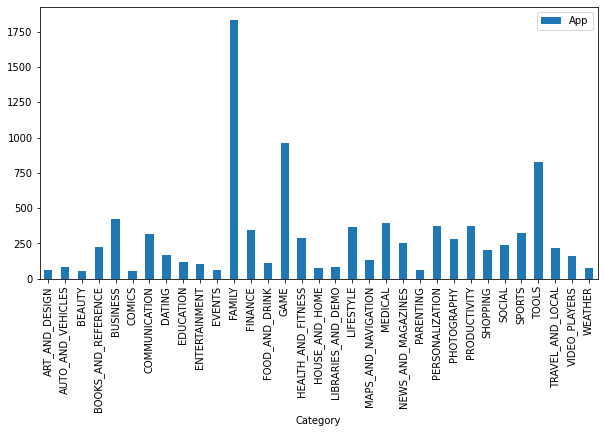

In [78]:
category_apps.plot(x='Category',y='App',figsize=(10,5),kind='bar')
plt.show()

What are the count of applications in each category differentiated by their type?

In [79]:
category_type=pd.DataFrame(df.groupby(by=['Category','Type'],as_index=False)['App'].count())
df_app_count = category_type.pivot('Category', 'Type', 'App').fillna(0).reset_index()
df_app_count

Type,Category,Free,Paid
0,ART_AND_DESIGN,61.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0
5,COMICS,56.0,0.0
6,COMMUNICATION,288.0,27.0
7,DATING,165.0,6.0
8,EDUCATION,115.0,4.0
9,ENTERTAINMENT,100.0,2.0


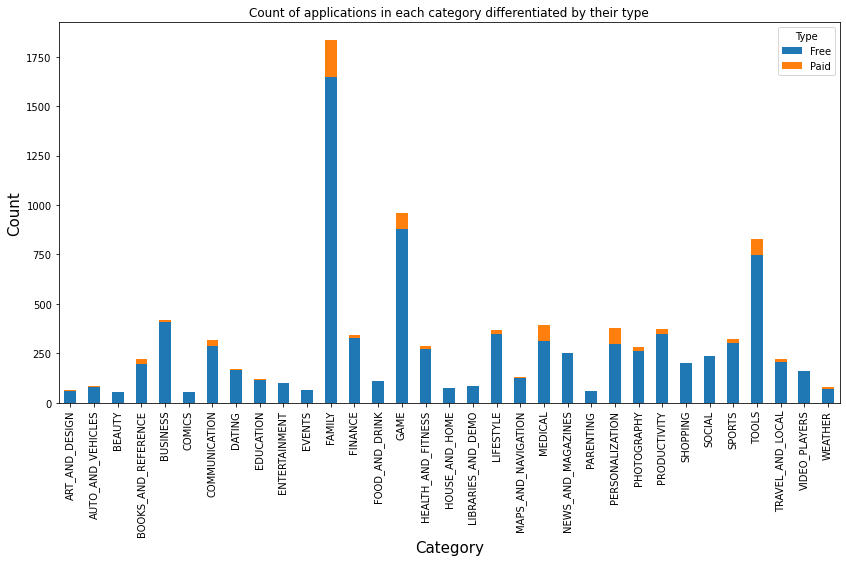

In [80]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

No of applications in various size intervals

In [81]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04, 9.40e+00,
       1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00, 7.90e+00,
       5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+00,
       5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00, 1.60e+04,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04, 3.20e+04,
       5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00, 7.10e+00,
       3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00, 8.20e+00,
       9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00, 1.30e+04,
       7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e+04, 2.30e

What is the average rating of ap on playstore

In [82]:
new_df=pd.DataFrame(df[df['Rating']==5.0][['App','Rating','Type']])
new_df[new_df['Type']=='Paid'].count()

App       28
Rating    28
Type      28
dtype: int64

Average rating of app on playstore

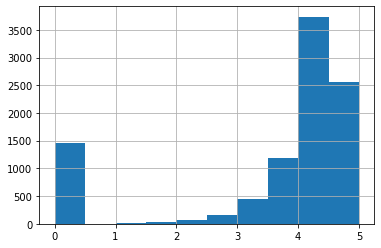

In [83]:
df['Rating'].hist()

In [84]:
print('avg mean is',np.median(df['Rating']))

avg mean is 4.2


Average size of apps

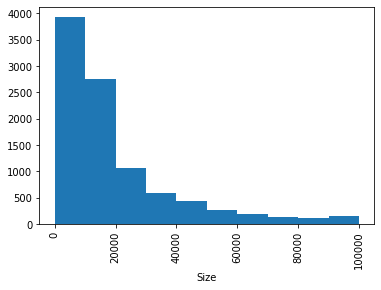

In [85]:
plt.hist(df['Size'])
plt.xlabel('Size')
plt.xticks(rotation=90)
plt.show()

Category vs rating

In [96]:
category_rating=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()
category_rating

,Category,Rating
0,EDUCATION,4.327731
1,ART_AND_DESIGN,4.153125
2,ENTERTAINMENT,4.135294
3,GAME,4.039208
4,COMICS,4.032143
5,PHOTOGRAPHY,3.891103
6,WEATHER,3.867089
7,SHOPPING,3.769307
8,VIDEO_PLAYERS,3.672393
9,FAMILY,3.668614


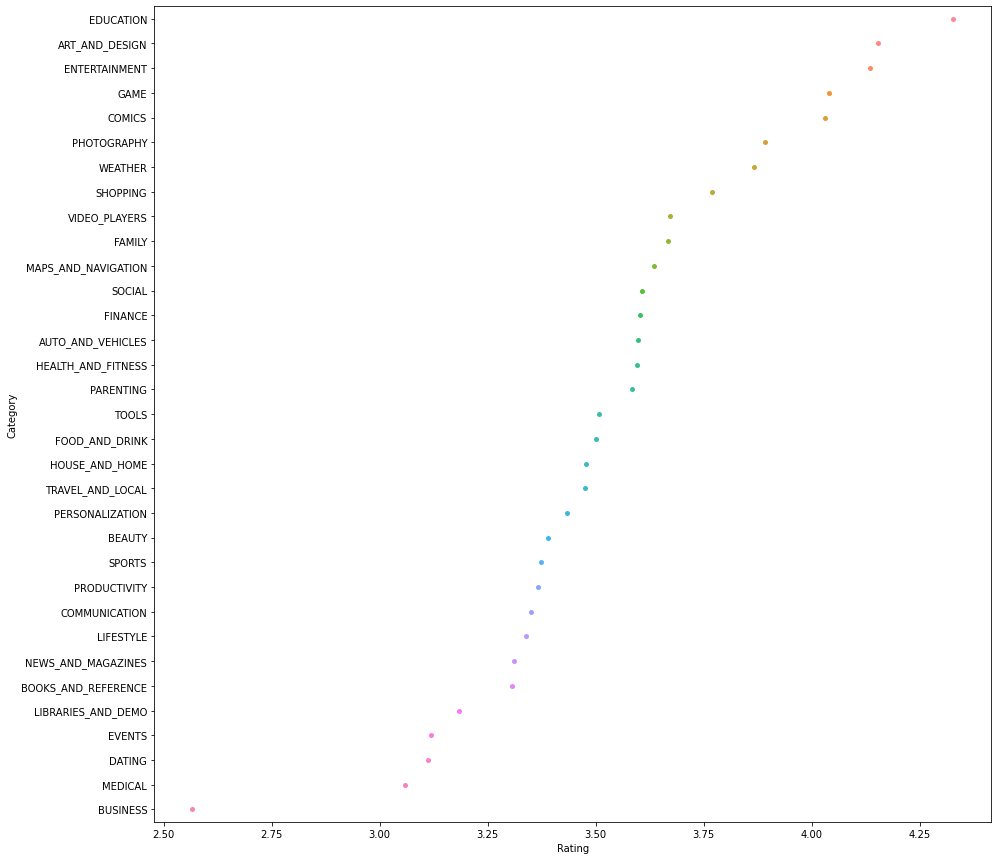

In [119]:
fig,ax=plt.subplots()
fig.set_size_inches(15,15)
ax=sns.swarmplot(x='Rating',y='Category',data=category_rating)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [113]:
generes_count=pd.DataFrame(df['Genres'].value_counts().reset_index(),columns=['Geners','No. of apps']).head(10)

In [114]:
generes_count

,Geners,No. of apps
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [ ]:
fig,ax=plt.subplots()
ax=sns.stripplot(x='')

In [106]:
app_review_count=df2.groupby('App')['Translated_Review'].count().reset_index()
app_review_count

,App,Translated_Review
0,10 Best Foods for You,194
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40
2,11st,39
3,1800 Contacts - Lens Store,80
4,1LINE – One Line with One Touch,38
...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,68
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,34
862,Hotstar,32
863,Hotwire Hotel & Car Rental App,33


In [98]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
